In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time


In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.scaler_X = StandardScaler()
        self.scaler_y = StandardScaler()
    
    def fit(self, X, y, verbose=True):
        """
        Train the linear regression model using gradient descent
        
        Parameters:
        X: training features (numpy array)
        y: target values (numpy array)
        verbose: whether to print progress during training
        """
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Record training start time
        start_time = time.time()
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Make predictions
            y_predicted = self._predict(X)
            
            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate cost function (MSE)
            cost = (1/(2*n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)
            
            # Optional: Print cost every 100 iterations
            if verbose and (i+1) % 100 == 0:
                print(f'Iteration {i+1}/{self.n_iterations}: Cost = {cost:.4f}')
        
        # Calculate training time
        training_time = time.time() - start_time
        if verbose:
            print(f"Training completed in {training_time:.2f} seconds")
    
    def _predict(self, X):
        """Make predictions using the current weights and bias"""
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        """Make predictions on new data"""
        return self._predict(X)
    
    def evaluate(self, X_test, y_test):
        """
        Evaluate the model using multiple metrics
        
        Parameters:
        X_test: test features
        y_test: test target values
        
        Returns:
        dict: dictionary containing various evaluation metrics
        """
        y_pred = self.predict(X_test)
        n_samples = len(y_test)
        
        # Mean Squared Error (MSE)
        mse = np.mean((y_test - y_pred) ** 2)
        
        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        
        # Mean Absolute Error (MAE)
        mae = np.mean(np.abs(y_test - y_pred))
        
        # R-squared (coefficient of determination)
        ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
        ss_residual = np.sum((y_test - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        
        # Adjusted R-squared
        n_features = X_test.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
        
        # Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'Adjusted R²': adj_r2,
            'MAPE': mape
        }
    
    def plot_cost_history(self):
        """Plot the cost function over iterations"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.n_iterations + 1), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Over Iterations')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def plot_predictions(self, X_test, y_test, feature_index=0, feature_name="Feature"):
        """
        Plot actual vs predicted values for a single feature
        
        Parameters:
        X_test: test features
        y_test: test target values
        feature_index: index of the feature to plot against (default: 0)
        feature_name: name of the feature for the x-axis label
        """
        y_pred = self.predict(X_test)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:, feature_index], y_test, color='blue', label='Actual')
        plt.scatter(X_test[:, feature_index], y_pred, color='red', alpha=0.5, label='Predicted')
        plt.xlabel(feature_name)
        plt.ylabel('Target')
        plt.title('Actual vs Predicted Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def plot_residuals(self, X_test, y_test, feature_index=0, feature_name="Feature"):
        """
        Plot residuals for a single feature
        
        Parameters:
        X_test: test features
        y_test: test target values
        feature_index: index of the feature to plot against (default: 0)
        feature_name: name of the feature for the x-axis label
        """
        y_pred = self.predict(X_test)
        residuals = y_test - y_pred
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test[:, feature_index], residuals, color='green')
        plt.axhline(y=0, color='r', linestyle='-')
        plt.xlabel(feature_name)
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Add residual histogram
        plt.figure(figsize=(10, 6))
        plt.hist(residuals, bins=20, color='green', alpha=0.7)
        plt.axvline(x=0, color='r', linestyle='-')
        plt.xlabel('Residual Value')
        plt.ylabel('Frequency')
        plt.title('Residual Distribution')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


def prepare_data(df, target_column, test_size=0.2, random_state=42, normalize=True):
    """
    Prepare data for linear regression
    
    Parameters:
    df: pandas DataFrame containing the dataset
    target_column: name of the target column
    test_size: proportion of data to use for testing
    random_state: random seed for reproducibility
    normalize: whether to normalize the features
    
    Returns:
    X_train, X_test, y_train, y_test, scaler_X, scaler_y
    """
    # Separate features and target
    X = df.drop(target_column, axis=1).values
    y = df[target_column].values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Normalize features if specified
    if normalize:
        scaler_X = StandardScaler()
        X_train = scaler_X.fit_transform(X_train)
        X_test = scaler_X.transform(X_test)
        
        # If y is multivariate, reshape it
        y_train_reshaped = y_train.reshape(-1, 1)
        y_test_reshaped = y_test.reshape(-1, 1)
        
        scaler_y = StandardScaler()
        y_train = scaler_y.fit_transform(y_train_reshaped).flatten()
        y_test = scaler_y.transform(y_test_reshaped).flatten()
        
        return X_train, X_test, y_train, y_test, scaler_X, scaler_y
    
    return X_train, X_test, y_train, y_test, None, None


In [6]:
from sklearn.datasets import fetch_california_housing

def main():
    # Load your dataset
    # Replace 'your_dataset.csv' with your actual data file path
    
    data = fetch_california_housing()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

    
    # Display first few rows of the dataset
    print("Dataset preview:")
    print(df.head())
    
    # Dataset info
    print("\nDataset information:")
    print(f"Number of samples: {df.shape[0]}")
    print(f"Number of features: {df.shape[1] - 1}")  # Assuming one column is the target
    
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nMissing values:")
        print(missing_values[missing_values > 0])
        
        # Handle missing values (simple imputation with mean)
        df = df.fillna(df.mean())
        print("Missing values filled with mean values.")
    
    # Prepare data for training
    # Replace 'target' with your actual target column name
    target_column = 'target'
    X_train, X_test, y_train, y_test, scaler_X, scaler_y = prepare_data(
        df, target_column, test_size=0.2, normalize=True
    )
    
    # Create and train the model
    print("\nTraining linear regression model...")
    lr = LinearRegression(learning_rate=0.01, n_iterations=1000)
    lr.fit(X_train, y_train)
    
    # Evaluate the model
    metrics = lr.evaluate(X_test, y_test)
    
    # Print evaluation metrics
    print("\nEvaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Print model parameters
    print("\nModel Parameters:")
    feature_names = df.drop(target_column, axis=1).columns
    for i, (feature, weight) in enumerate(zip(feature_names, lr.weights)):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (Intercept): {lr.bias:.4f}")
    
    # Visualizations
    print("\nGenerating visualizations...")
    
    # Plot cost history
    lr.plot_cost_history()
    
    # Plot predictions vs actual for the first feature
    first_feature = feature_names[0]
    lr.plot_predictions(X_test, y_test, feature_index=0, feature_name=first_feature)
    
    # Plot residuals
    lr.plot_residuals(X_test, y_test, feature_index=0, feature_name=first_feature)
    
    # If the target was normalized, convert predictions back to original scale for interpretation
    if scaler_y:
        print("\nPrediction example (in original scale):")
        sample_X = X_test[:5]  # Take first 5 test samples
        sample_y_true = scaler_y.inverse_transform(y_test[:5].reshape(-1, 1)).flatten()
        sample_y_pred = scaler_y.inverse_transform(lr.predict(sample_X).reshape(-1, 1)).flatten()
        
        for i in range(len(sample_X)):
            print(f"Sample {i+1}: Actual = {sample_y_true[i]:.2f}, Predicted = {sample_y_pred[i]:.2f}")
    
    print("\nLinear regression analysis completed!")


Dataset preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset information:
Number of samples: 20640
Number of features: 8

Training linear regression model...
Iteration 100/1000: Cost = 0.2733
Iteration 200/1000: Cost = 0.2377
Iteration 300/1000: Cost = 0.2278
Iteration 400/1000: Cost = 0.2222
Iteration 500/1000: Cost = 0.2180
Iteration 600/1000: Cost = 0.2144
Iteration 700/1000: Cost = 0.2114
Iteration 800/1000: Cost = 0.2089
Iteration 

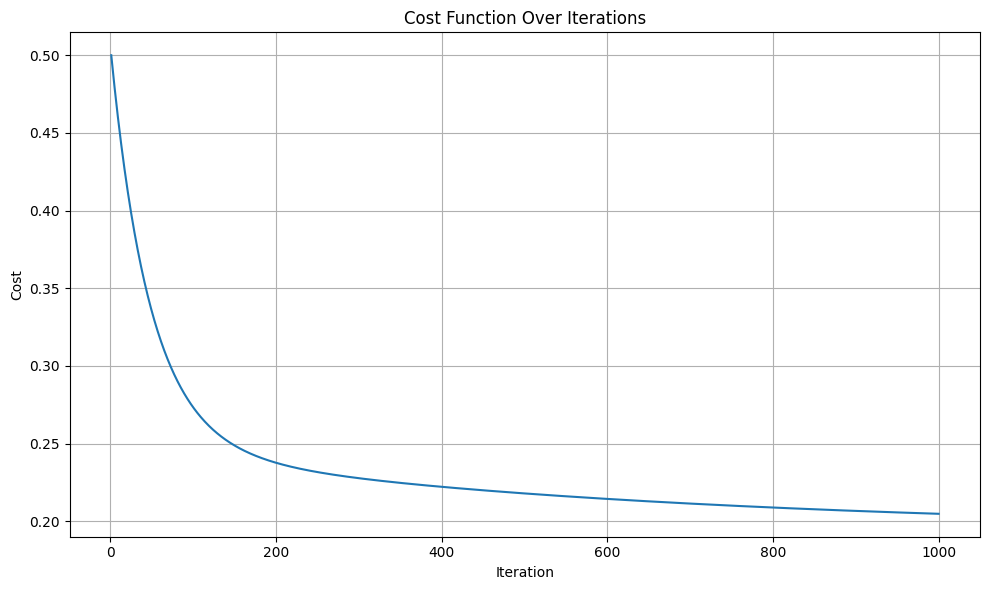

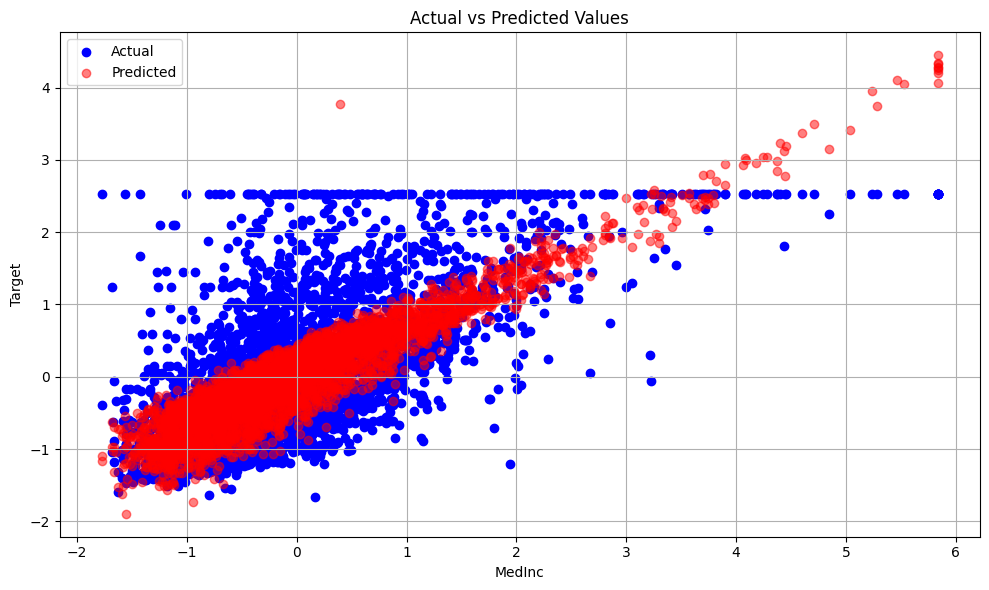

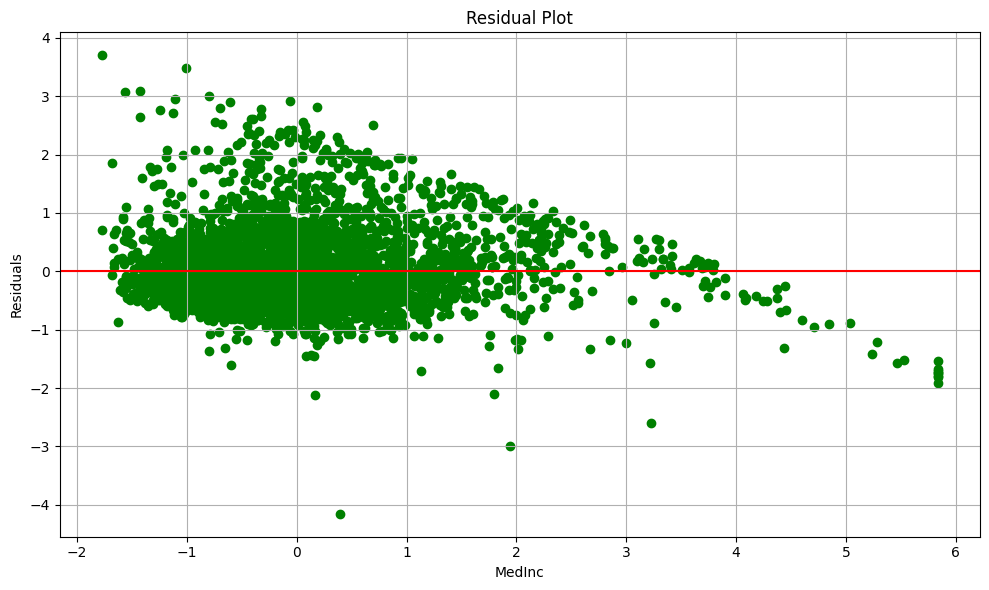

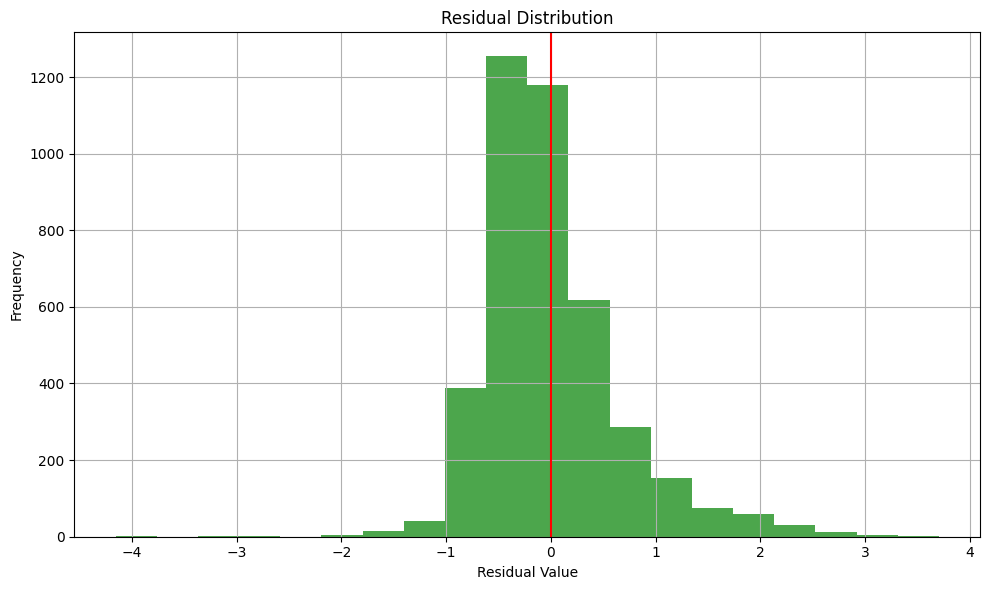


Prediction example (in original scale):
Sample 1: Actual = 0.48, Predicted = 0.88
Sample 2: Actual = 0.46, Predicted = 1.65
Sample 3: Actual = 5.00, Predicted = 2.50
Sample 4: Actual = 2.19, Predicted = 2.77
Sample 5: Actual = 2.78, Predicted = 2.36

Linear regression analysis completed!


In [7]:
if __name__ == "__main__":
    main()
